# Phase Diagram
In this example, we will generate a 1D and 2D phase diagram for FeOx species.

## Topics Covered
- Create ``Nasa`` and ``StatMech`` objects 
- Initialize ``Reaction`` objects to describe the formation reaction of FeOx species
- Generate a 1D phase diagram by varying T
- Generate a 2D phase diagram by varying T and P
- Save the ``PhaseDiagram`` object as a ``JSON`` file

## Create Species for Phase Diagram
We will be considering three iron oxide species: FeO, Fe3O4, and Fe2O3. All the empirical data (from NIST) will be converted to ``Nasa`` objects. O2, on the other hand, will be a ``StatMech`` object so that it will be dependent on pressure.

If you are unfamiliar with initializing objects using experimental data, see the Experimental to Empirical example.

In [1]:
from pprint import pprint
import numpy as np
from ase.build import molecule
from pMuTT.empirical.nasa import Nasa
from pMuTT.statmech import StatMech, presets

# Temperature (in K) corresponding to standard enthalpy 
# and standard entropy
T_ref = 298.

# Temperatures (in K) corresponding to heat capacity
T = np.array([298., 300., 305., 310., 315., 320., 325., 330., 
              335., 340., 345., 350., 355., 360., 365., 370., 
              375., 380., 385., 390., 395., 400., 405., 410., 
              415., 420., 425., 430., 435., 440., 445., 450., 
              455., 460., 465., 470., 475., 480., 485., 490., 
              495., 500])

# Fe data
CpoR_Fe = np.array([3.018129466, 3.023626079, 3.037347372, 
                    3.051041872, 3.06471211, 3.078360492, 
                    3.091989304, 3.105600726, 3.119196843, 
                    3.13277965, 3.14635106, 3.159912915, 
                    3.173466988, 3.187014988, 3.20055857, 
                    3.214099334, 3.227638833, 3.241178576, 
                    3.25472003, 3.268264625, 3.281813753, 
                    3.295368778, 3.308931031, 3.322501816, 
                    3.336082411, 3.34967407, 3.363278024, 
                    3.376895484, 3.390527642, 3.404175671, 
                    3.417840728, 3.431523954, 3.445226474, 
                    3.458949401, 3.472693834, 3.486460862, 
                    3.500251559, 3.514066993, 3.527908217, 
                    3.54177628, 3.555672217, 3.569597059])
HoRT_Fe = 0.
SoR_Fe = 3.284428696

# FeO data
CpoR_FeO = np.array([6.004980757, 6.010160937, 6.022964518, 
                     6.035567503, 6.047980643, 6.060213866, 
                     6.072276342, 6.084176563, 6.095922395, 
                     6.107521136, 6.118979564, 6.130303982, 
                     6.141500259, 6.152573863, 6.163529897, 
                     6.174373123, 6.185107998, 6.195738688, 
                     6.206269099, 6.216702891, 6.227043498, 
                     6.237294147, 6.247457872, 6.257537527, 
                     6.267535799, 6.277455222, 6.287298187, 
                     6.297066948, 6.306763637, 6.31639027, 
                     6.325948754, 6.335440896, 6.344868406, 
                     6.354232908, 6.363535942, 6.372778972, 
                     6.381963388, 6.391090513, 6.400161605, 
                     6.409177863, 6.418140429, 6.427050393])
HoRT_FeO = -109.7966298
SoR_FeO = 7.303137557

# Fe3O4 data
CpoR_Fe3O4 = np.array([17.70205065, 17.76448405, 17.91908664, 
                       18.07168569, 18.2224119, 18.37138586, 
                       18.51871897, 18.66451424, 18.80886707, 
                       18.95186592, 19.09359287, 19.2341242, 
                       19.37353085, 19.5118789, 19.64922991, 
                       19.78564135, 19.92116686, 20.0558566, 
                       20.18975749, 20.32291349, 20.45536576, 
                       20.58715296, 20.71831135, 20.848875, 
                       20.97887597, 21.10834441, 21.23730872, 
                       21.36579565, 21.49383045, 21.62143694, 
                       21.7486376, 21.8754537, 22.00190534, 
                       22.12801153, 22.25379029, 22.37925867, 
                       22.50443285, 22.62932817, 22.75395919, 
                       22.87833973, 23.00248293, 23.12640128])
HoRT_Fe3O4 = -452.3912981
SoR_Fe3O4 = 17.46008698

# Fe2O3 data
CpoR_Fe2O3 = np.array([12.47757489, 12.52697445, 12.64787689, 
                       12.7652535, 12.87931824, 12.99026871, 
                       13.09828757, 13.20354395, 13.3061946, 
                       13.40638501, 13.50425036, 13.59991643, 
                       13.69350035, 13.78511133, 13.87485131, 
                       13.96281555, 14.04909315, 14.13376754, 
                       14.21691692, 14.29861465, 14.37892962, 
                       14.45792659, 14.53566649, 14.6122067, 
                       14.68760129, 14.76190128, 14.83515483, 
                       14.90740747, 14.97870223, 15.04907987, 
                       15.11857898, 15.18723616, 15.25508613, 
                       15.32216185, 15.38849466, 15.45411434, 
                       15.51904926, 15.58332641, 15.64697155, 
                       15.71000921, 15.77246282, 15.83435478])
HoRT_Fe2O3 = -333.1719719
SoR_Fe2O3 = 10.49736076

O2 = StatMech(vib_wavenumbers=np.array([1580.2]),
              potentialenergy=-0.1879339246281043, 
              spin=1.,
              symmetrynumber=2,
              atoms=molecule('O2'), 
              **presets['idealgas'])

species = {
    'Fe': Nasa.from_data(name='Fe', T=T, CpoR=CpoR_Fe, T_ref=T_ref, 
                         HoRT_ref=HoRT_Fe, SoR_ref=SoR_Fe),
    'FeO': Nasa.from_data(name='FeO', T=T, CpoR=CpoR_FeO, T_ref=T_ref, 
                          HoRT_ref=HoRT_FeO, SoR_ref=SoR_FeO),
    'Fe3O4': Nasa.from_data(name='Fe3O4', T=T, CpoR=CpoR_Fe3O4, T_ref=T_ref, 
                            HoRT_ref=HoRT_Fe3O4, SoR_ref=SoR_Fe3O4),
    'Fe2O3': Nasa.from_data(name='Fe2O3', T=T, CpoR=CpoR_Fe2O3, T_ref=T_ref, 
                            HoRT_ref=HoRT_Fe2O3, SoR_ref=SoR_Fe2O3),
    'O2': O2,
}

# (Optional) Print the species dictionary
pprint(species)

{'Fe': Nasa object for Name: Fe
	phase: None
	elements: None
	references: None
	notes: None
	statmech_model: None
	T_low: 298.0
	T_mid: 380.0
	T_high: 500.0
	a_low: [ 2.01449208e+00  4.56218533e-03 -6.39848753e-06  9.56223988e-09
 -5.16521158e-12 -7.62871062e+02 -9.34191359e+00]
	a_high: [ 2.09765123e+00  3.68475333e-03 -2.91355935e-06  3.38794160e-09
 -1.04854127e-12 -7.69200680e+02 -9.66260833e+00],
 'Fe2O3': Nasa object for Name: Fe2O3
	phase: None
	elements: None
	references: None
	notes: None
	statmech_model: None
	T_low: 298.0
	T_mid: 380.0
	T_high: 500.0
	a_low: [-1.45020829e+01  2.16728052e-01 -6.84930159e-04  1.07356269e-06
 -6.58251701e-10 -1.00352063e+05  5.07720517e+01]
	a_high: [-3.90419180e+00  1.04908021e-01 -2.40814218e-04  2.86723130e-07
 -1.33637083e-10 -1.01158722e+05  9.90229288e+00],
 'Fe3O4': Nasa object for Name: Fe3O4
	phase: None
	elements: None
	references: None
	notes: None
	statmech_model: None
	T_low: 298.0
	T_mid: 380.0
	T_high: 500.0
	a_low: [-3.34832035e

## Create Reactions for Phase Diagram
The reactions will be initialized and put in a list. Notice that the stiochiometric coefficient of O2 in all reactions is 1 to ensure consistency. If you are unfamiliar with initializing reactions, see the reactions example.

In [2]:
from pMuTT.reaction import Reaction

reactions = [
    Reaction.from_string(reaction_str='2Fe+O2=2FeO', species=species),
    Reaction.from_string(reaction_str='{}Fe+O2={}Fe2O3'.format(4./3., 2./3.), 
                         species=species),
    Reaction.from_string(reaction_str='1.5Fe+O2=0.5Fe3O4', species=species)
]

## Create PhaseDiagram Object
Now we have everything we need to create the ``PhaseDiagram`` object.

In [3]:
from pMuTT.reaction.phasediagram import PhaseDiagram

phase_diagram = PhaseDiagram(reactions=reactions)

## Creating a 1D Phase Diagram

Text(0.5,0,'Temperature (K)')

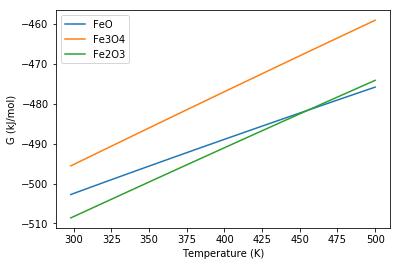

In [4]:
from matplotlib import pyplot as plt

fig1, ax1 = phase_diagram.plot_1D(x_name='T', x_values=T, P=1., G_units='kJ/mol')

'''Plotting adjustments'''
# Add custom legend
ax1.legend(labels=['FeO', 'Fe3O4', 'Fe2O3'])
# Add custom x axis label
ax1.set_xlabel('Temperature (K)')


## Creating a 2D Phase Diagram

[Text(1,0,'FeO'), Text(1,0,'Fe3O4'), Text(1,0,'Fe2O3')]

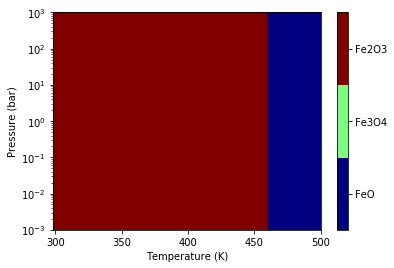

In [5]:
# Generate Pressure range
P = np.logspace(-3, 3)

fig3, ax3, c3, cbar3 = phase_diagram.plot_2D(x1_name='T', x1_values=T, 
                                             x2_name='P', x2_values=P, 
                                             G_units='kJ/mol')

'''Plotting adjustments'''
# Add custom axis labels
ax3.set_xlabel('Temperature (K)')
ax3.set_ylabel('Pressure (bar)')
# Change y axis to log scale
ax3.set_yscale('log')
# Add custom colors
plt.set_cmap('jet')
# Set custom labels on colorbar
cbar3.ax.set_yticklabels(['FeO', 'Fe3O4', 'Fe2O3'])